* * *
<pre> NYU Paris            <i> Machine Learning - Sumer 2023 </i></pre>
* * *


<h1 align="center"> Lab Unsupervised learning: clustering </h1>

<pre align="left"> June 08th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- More practice with numpy and matplotlib
- Understand the pros and cons of K-means clustering, hierarchical clustering and GMM

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

seed = 42

# Part 1: Implementing K-means

In the past labs, we have mainly seen:
- dimension reduction (with PCA)
- classification (i.e supervised learning)

In practice however, the vast majority of data does not have labels. Finding structure and patterns in data without labels is called unsupervised learning. Given a specified number of clusters K, the K-means algorithm forms a partition of your data with K different groups while trying to:
- minimize the variance within groups (i.e samples forming a group must be close to each other)
- maximize the variance between groups (i.e groups must be far from each other).

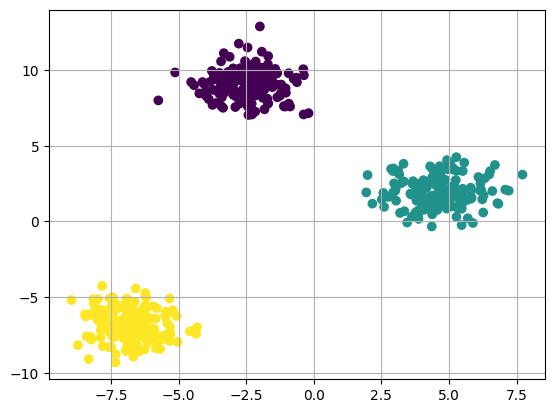

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

seed = 42
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
import random
def init_centroids(K, dimension=2):
    centroids = []
    for k in range(K):
        centroid = tuple(random.random() for _ in range(dimension))
        centroids.append(centroid)
    return centroids
from sklearn.metrics import pairwise_distances
def assign_labels(X, centroids):
    pair = pairwise_distances(X,centroids, metric = 'euclidean')
    labels = np.argmin(pair, axis=1)
    return labels

def plot_kmeans(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()
def update_centroids(X, labels, centroids):
    k = centroids.shape[0]  # Number of clusters
    new_centroids = np.zeros_like(centroids)  # Initialize new centroids

    for i in range(k):
        # Get the data points assigned to cluster i
        cluster_points = X[labels == i]
        # Update centroid of cluster i to be the mean of its data points
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

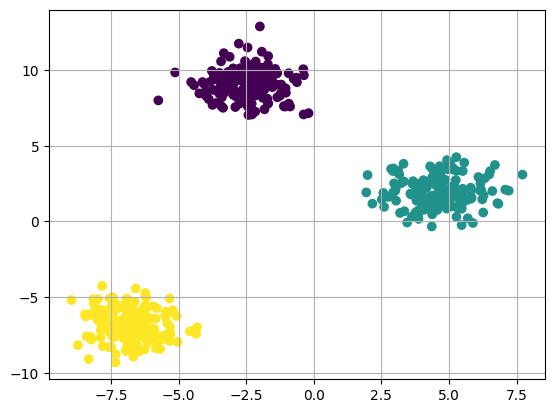

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


It is called K-means because it only consists of two steps. Starting from an initialization of K mean values $M_k$:
- For each sample $x$ of your data, find the mean (centroid) $C_k$ that is closest to x. Assign $x$ to group $k$.
- Update the mean $C_k$ of each group k

### Question 1
Write a function that generates K random initializations for the group centroids $C_k$.

In [12]:
import random
def init_centroids(K, dimension=2):
    centroids = []
    for k in range(K):
        centroid = tuple(random.random() for _ in range(dimension))
        centroids.append(centroid)
    return centroids

### Question 2
Write a function that takes the data X (n, d) and returns an array (n,) containing the id of the cluster it should be assigned to. For example, the function returns [0, 0, 2, 1, 2] if the first two samples are assigned to cluster 0, the 3rd and 5th samples to cluster 2 and the 4th sample to cluster 1.

_Hint: look up `sklearn.metrics.pairwise_distances` and the numpy method of an array `array.argmin`_

In [13]:
from sklearn.metrics import pairwise_distances
def assign_labels(X, centroids):
    pair = pairwise_distances(X,centroids, metric = 'euclidean')
    labels = np.argmin(pair, axis=1)
    return labels

### Question 3
The following cell visualizes the centroids and their assigned samples. Initialize the centroids and compute a first set of labels of your data and visualize them. Can you think of a smarter way to initialize these centroids using the data? (No need to implement it for now).

In [14]:
def plot_kmeans(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()


### Question 4
Write a function that computes the new centroids using the assigned labels. Visualize the new centroids. Repeat these steps (label assignment + centroid update) for 2-3 steps. Does it converge?

In [15]:
def update_centroids(X, labels, centroids):
    k = centroids.shape[0]  # Number of clusters
    new_centroids = np.zeros_like(centroids)  # Initialize new centroids

    for i in range(k):
        # Get the data points assigned to cluster i
        cluster_points = X[labels == i]
        # Update centroid of cluster i to be the mean of its data points
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

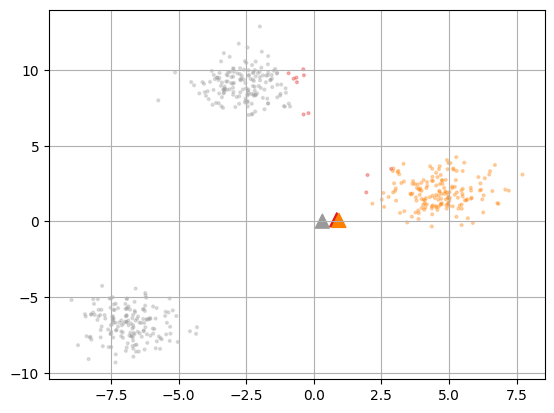

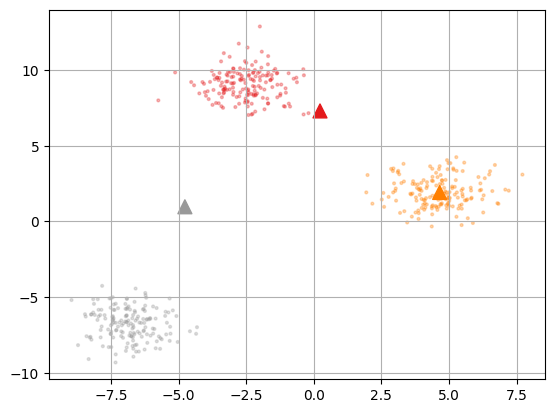

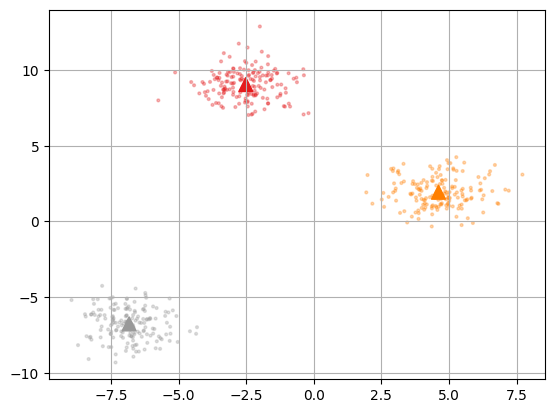

Final centroids:
[[-2.51336974  9.03492867]
 [ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]]


In [16]:
def repeat_kmeans(X, centroids, max_iterations=3):
    for _ in range(max_iterations):
        # Assign labels
        labels = assign_labels(X, centroids)

        # Plot current clusters and centroids
        plot_kmeans(X, labels, centroids)

        # Update centroids
        centroids = update_centroids(X, labels, centroids)

    return centroids

# Initialize centroids
K = 3
initial_centroids = np.array(init_centroids(K))

# Perform K-means clustering for 2-3 steps
final_centroids = repeat_kmeans(X, initial_centroids, max_iterations=3)

print("Final centroids:")
print(final_centroids)

As shown in the plotted figures above, the random centroids converge into the real centroids after 3 iterations, the clusters are clustered clearly into three seperate and correct clusters.

### Question 5
The K-means algorithm repeats these operations until the centroids stop changing. Write a function summing up all these operations.

In [17]:
def Kmeans(X, K=3, maxiter=100, plot_steps=False):
    dimension = X.shape[1]

    # Initialization
    centroids = np.array(init_centroids(K, dimension))

    for _ in range(maxiter):
        # Assign labels
        labels = assign_labels(X, centroids)

        # Update centroids
        new_centroids = update_centroids(X, labels, centroids)

        if plot_steps:
            plot_kmeans(X, labels, centroids)
         # Stopping condition
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids


    return labels, centroids

### Question 6

Generate different sets of data examples (changing the `cluster_std` parameter) and visualize the K-means output. What do you notice?

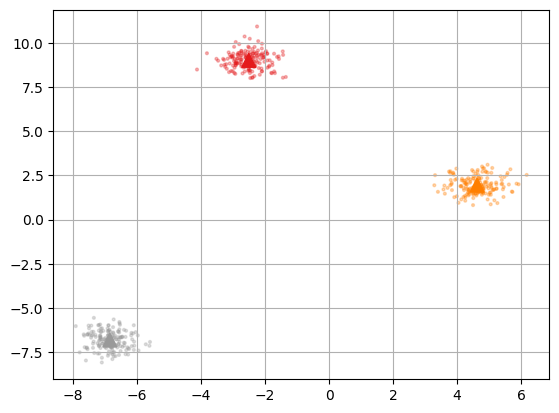

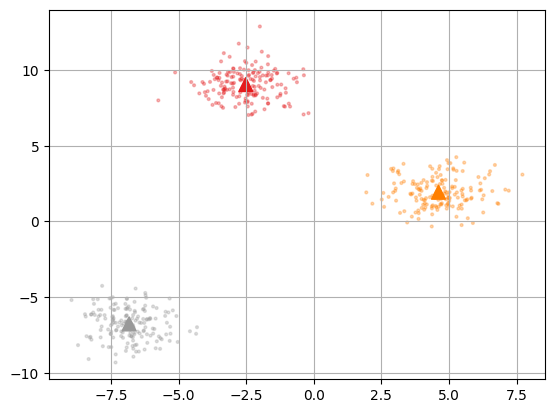

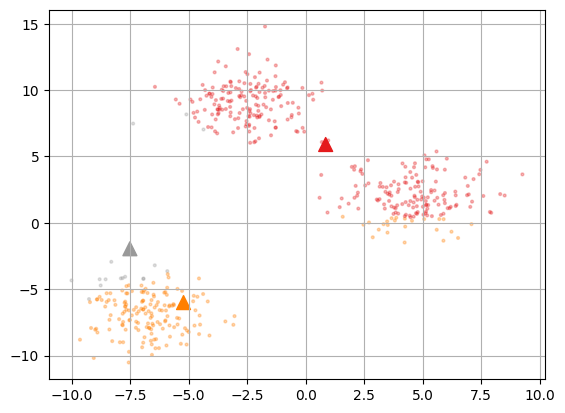

In [18]:
#HAVE A LOOK HERE LATER

cluster_std_values = [0.5, 1.0, 1.5]
for cluster_std in cluster_std_values:
    # Generate data
    X, y = make_blobs(500, centers=3, n_features=2, cluster_std=cluster_std, random_state=seed)

    # Perform K-means clustering
    labels, centroids = Kmeans(X, K=3, plot_steps=False)
    # Visualize clusters and centroids
    #plt.title(f'K-means with cluster_std={cluster_std}')
    plot_kmeans(X, labels, centroids)


As the variance of the clusters increases, the error of determining the correct clusters increases and the clusters  become more difficult to define, due to their interchanging.

### Question 7
Try Kmeans with this new data. Choose K wisely. Is it normal that Kmeans fails?

Yes, it is normal that kmeans would fail in such dataset. In this dataset, the clusters are not linearly seperable, more especifically, they are more like two circles inside each other. Therefore, when applying kmeans, it would never settle (converge). As we increase the number of iterations, the centroid change, and thus the clusters associated to it as it becomes more close to a side and further from other, leaving the other data points for the other cluster.

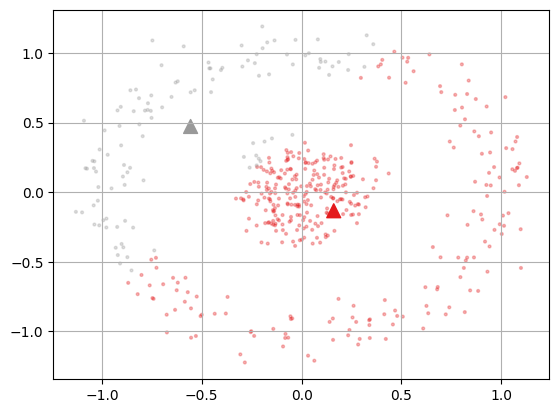

In [19]:
from sklearn.datasets import make_circles

X, y = make_circles(500, noise=0.1, factor=0.2)
# Apply K-means to the data
labels, centroids = Kmeans(X, K=2, maxiter=500, plot_steps=False)
# Visualize clusters and centroids
plot_kmeans(X, labels, centroids)


# Part 2: Compressing images with K-means
Is it often the case that data is redundant. Take the example of the image below:

Image original shape:  (427, 640, 3)
Flower colors shape:  (273280, 3)


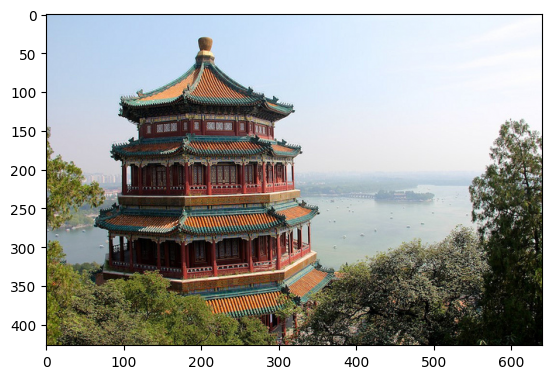

In [20]:
from sklearn.datasets import load_sample_image

flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)

print("Image original shape: ", flower_shape)
print("Flower colors shape: ", flower_colors.shape)

max_color = flower.max()

plt.figure()
plt.imshow(flower)
plt.show()

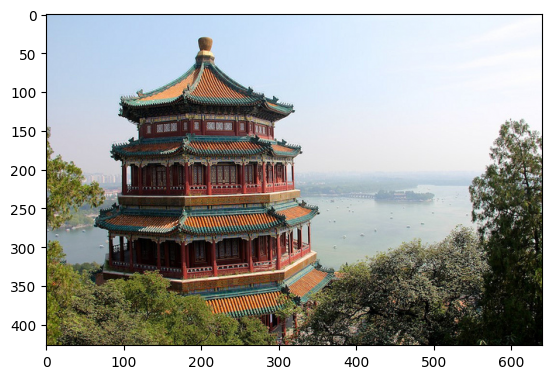

In [21]:
plt.imshow(flower)

### Question 8
We would like to replace all colors by replacing them with the centroid they're closest to. Let's for example reduce them to 16. Run the Kmeans algorithm with K=16 on the downsampled colors array X. Then create a new image with the replaced colors and visualize it.

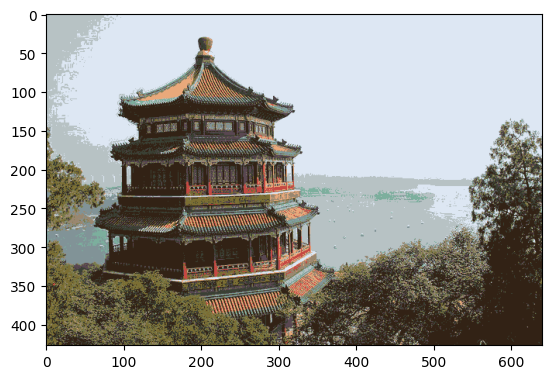

In [22]:
from sklearn.utils import shuffle
# Load the flower colors dataset
flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)

# Shuffle the dataset
X = shuffle(flower_colors, random_state=0)

# Perform k-means clustering with K=16
labels, centroids = Kmeans(X.copy(), K=16, maxiter=100, plot_steps=False)

# Update the flower colors with the new cluster assignments
flower_colors = centroids[assign_labels(flower_colors, centroids)].reshape(flower_shape)

# Display the resulting image
plt.figure()
plt.imshow(flower_colors)
plt.show()

In [23]:
flower_colors

array([[[0.72108118, 0.76344997, 0.77078946],
        [0.72108118, 0.76344997, 0.77078946],
        [0.72108118, 0.76344997, 0.77078946],
        ...,
        [0.86681754, 0.9066002 , 0.95553952],
        [0.86681754, 0.9066002 , 0.95553952],
        [0.86681754, 0.9066002 , 0.95553952]],

       [[0.72108118, 0.76344997, 0.77078946],
        [0.72108118, 0.76344997, 0.77078946],
        [0.72108118, 0.76344997, 0.77078946],
        ...,
        [0.86681754, 0.9066002 , 0.95553952],
        [0.86681754, 0.9066002 , 0.95553952],
        [0.86681754, 0.9066002 , 0.95553952]],

       [[0.72108118, 0.76344997, 0.77078946],
        [0.72108118, 0.76344997, 0.77078946],
        [0.72108118, 0.76344997, 0.77078946],
        ...,
        [0.86681754, 0.9066002 , 0.95553952],
        [0.86681754, 0.9066002 , 0.95553952],
        [0.86681754, 0.9066002 , 0.95553952]],

       ...,

       [[0.22984863, 0.25168719, 0.20433275],
        [0.46836405, 0.48574151, 0.30307559],
        [0.48490522, 0

### Question 9
Play around with the value of n_clusters (K). What do you notice?

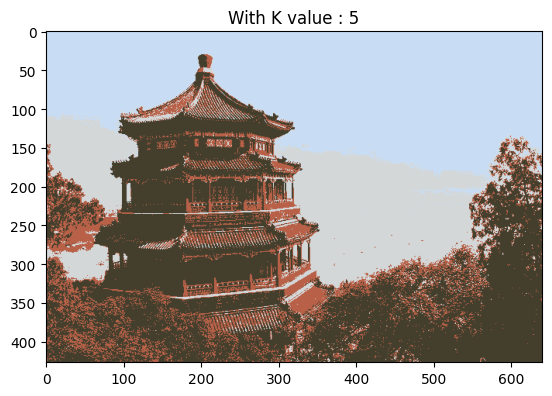

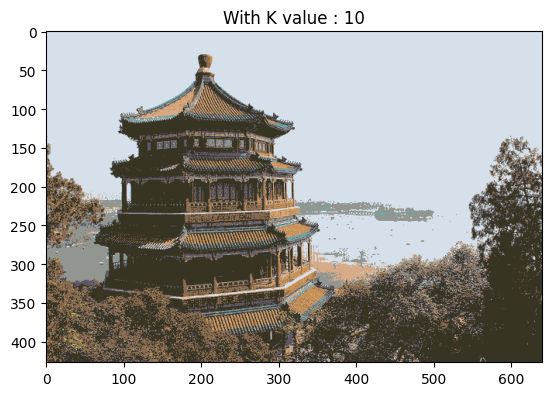

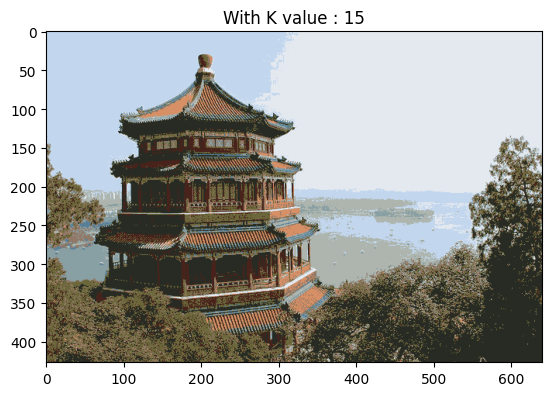

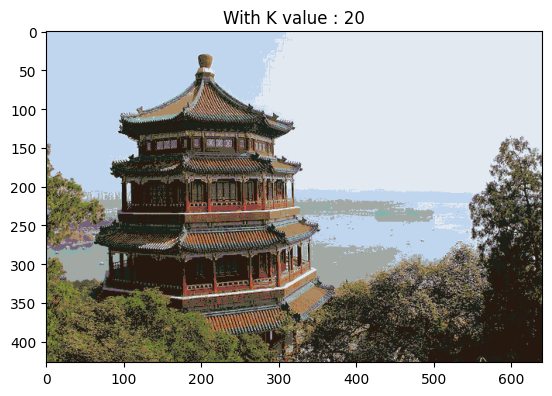

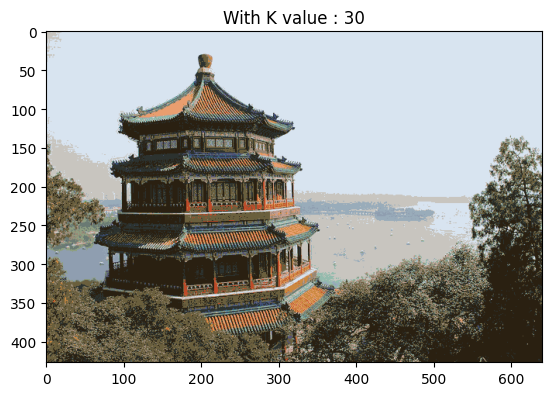

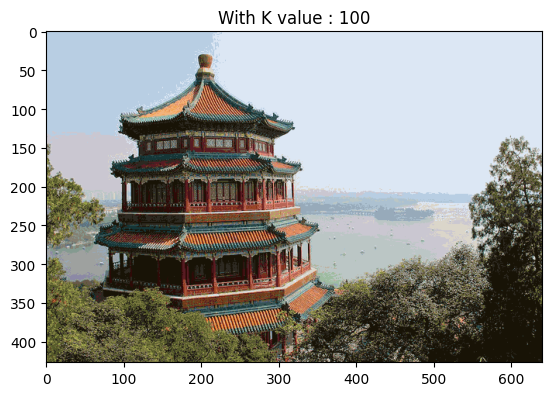

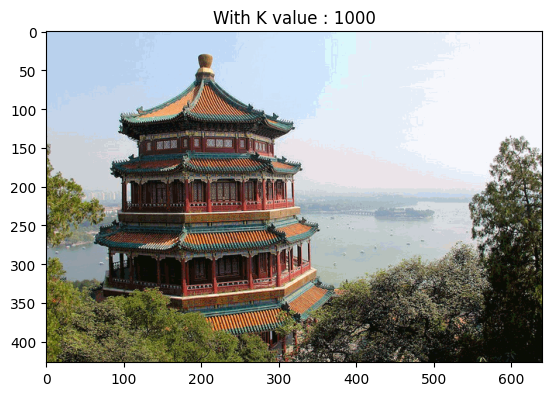

In [24]:
# Load the flower colors dataset
K_values = [5,10,15,20,30,100,1000]
for i in range(len(K_values)):
  flower = load_sample_image('china.jpg') / 255
  flower_shape = flower.shape
  flower_colors = flower.reshape(-1, 3)
  # Shuffle the dataset
  X = shuffle(flower_colors, random_state=0)

  # Perform k-means clustering with K=16
  labels, centroids = Kmeans(X.copy(), K=K_values[i], maxiter=100, plot_steps=False)

  # Update the flower colors with the new cluster assignments
  flower_colors = centroids[assign_labels(flower_colors, centroids)].reshape(flower_shape)

  # Display the resulting image
  plt.figure()
  plt.title(f"With K value : {K_values[i]}")
  plt.imshow(flower_colors)
  plt.show()

As the number of clusters (k) increase, the number of available colors (classes) to use increases, therefore, the image look more like the original image.

### Question 10
Try this out but using the sklearn implementation of Kmeans. Do you obtain similar results? Can you explain the difference?

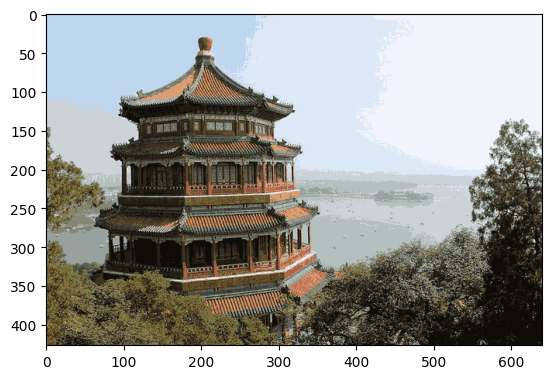

In [25]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)
X = shuffle(flower_colors, random_state=0)
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)
flower_colors = kmeans.cluster_centers_[kmeans.predict(flower_colors)]

flower_colors = flower_colors.reshape(flower_shape)

plt.figure()
plt.imshow(flower_colors)
plt.show()

Yes, the results are quite similar. The difference is that the colors, saturation and hue are different, Due to different clustering choices. This may be a result of different linkage criteria or any other hyperparameter, such as the number of iterations.

# Part 3: Implementing  Hierarchical clustering


## Question 11

Implement a function that compute the distance matrix between data. The parameter 'distance' define the chosen distance on the Euclidean space. You can use functions from scipy or sklearn. Implement three distances of your choice.

In [26]:
def distance_matrix(X, distance='euclidean'):
    if distance == 'euclidean':
        return np.linalg.norm(X[:, np.newaxis] - X, axis=2)
    elif distance == 'manhattan':
        return np.abs(X[:, np.newaxis] - X).sum(axis=2)
    elif distance == 'chebyshev':
        return np.abs(X[:, np.newaxis] - X).max(axis=2)
    else:
        raise ValueError("Unsupported distance metric {}".format(distance))


## Question 12

Implement diffent similarity functions between clusters that you have seen in class (Linkage slide). Regarding the question 13, find a clever way to implement cluster variable (cluster1, cluster2).

In [27]:
def cluster_similarity(cluster1, cluster2, X, matrix_distance, linkage, distance='euclidean'):
    if linkage == 'single':
        # Compute the single linkage distance
        dist_matrix = np.min(matrix_distance[np.ix_(cluster1, cluster2)])
    elif linkage == 'complete':
        # Compute the complete linkage distance
        dist_matrix = np.max(matrix_distance[np.ix_(cluster1, cluster2)])
    elif linkage == 'centroid':
        # Compute the centroid linkage distance
        centroids1 = np.mean(X[cluster1], axis=0)
        centroids2 = np.mean(X[cluster2], axis=0)
        dist_matrix = np.linalg.norm(centroids1 - centroids2)
    elif linkage == 'average':
        # Compute the average linkage distance
        dist_matrix = np.mean(matrix_distance[np.ix_(cluster1, cluster2)])
    else:
        raise ValueError("Unsupported linkage method {}".format(linkage))
    return dist_matrix


## Question 13

Implement a function that performs Agglomerative Hierarchical Clustering.

In [28]:
def agglo_hier_clust(X, n_clusters, linkage='single', distance='euclidean'):
    n_samples = X.shape[0]
    labels = np.arange(n_samples)

    # Initialize distance matrix
    dist_matrix = distance_matrix(X, distance=distance)

    while len(np.unique(labels)) > n_clusters:
        min_dist = np.inf
        min_i, min_j = -1, -1

        # Find the closest pair of clusters
        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                if labels[i] != labels[j]:
                    dist = cluster_similarity([i], [j], X, dist_matrix, linkage, distance=distance)
                    if dist < min_dist:
                        min_dist = dist
                        min_i, min_j = i, j

        # Merge the closest pair of clusters
        labels[labels == labels[min_j]] = labels[min_i]

    return labels

## Question 14 (Bonus)

Implement a function that performs Divisive Hierarchical Clustering.

In [29]:
def divisive_hier_clust(X, linkage='average', threshold=0.1):
    n_samples = X.shape[0]
    clusters = [np.arange(n_samples)]

    while len(clusters) > 1:
        # Find the pair of clusters with the maximum distance
        max_dist = -1.0
        i_max, j_max = -1, -1
        for i, cluster_i in enumerate(clusters):
            for j, cluster_j in enumerate(clusters):
                if i == j:
                    continue

                # Compute the distance between the two clusters
                dist_ij = cluster_distance(X[cluster_i], X[cluster_j], linkage)

                if dist_ij > max_dist:
                    max_dist = dist_ij
                    i_max, j_max = i, j

        # Check if the maximum distance is greater than the threshold
        if max_dist <= threshold:
            break

        # Divide the cluster with the maximum distance
        cluster_i, cluster_j = clusters[i_max], clusters[j_max]
        clusters.remove(cluster_j)

        # Find the index of the first point in cluster_j
        j_start = np.min(cluster_j)

        # Create a new cluster for each point in cluster_j
        for j in cluster_j:
            cluster_i_new = np.delete(cluster_i, np.where(cluster_i == j))
            cluster_j_new = np.array([j])
            clusters.append(np.concatenate([cluster_i_new, cluster_j_new]))

    return clusters

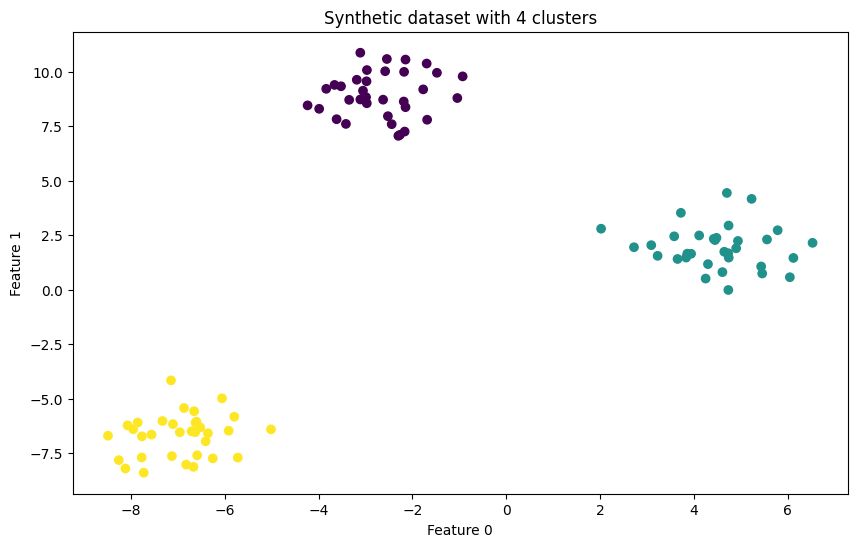

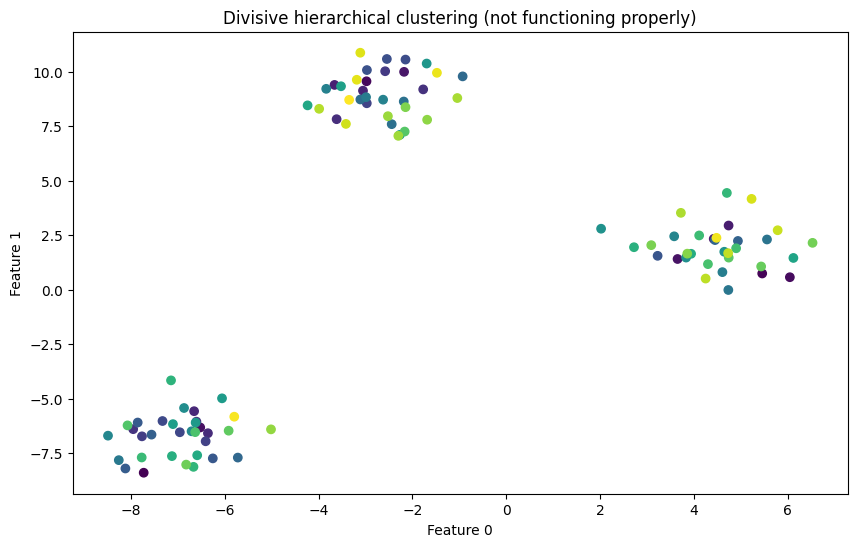

In [30]:
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic dataset with 4 clusters')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

# Perform divisive hierarchical clustering with Ward linkage
clusters = divisive_hier_clust(X, linkage='average', threshold=1.0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=[clusters[0][i] for i in range(len(X))])
plt.title('Divisive hierarchical clustering (not functioning properly)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

## Question 15

Apply this (or these) algorithm(s) on the Gaussian blobs

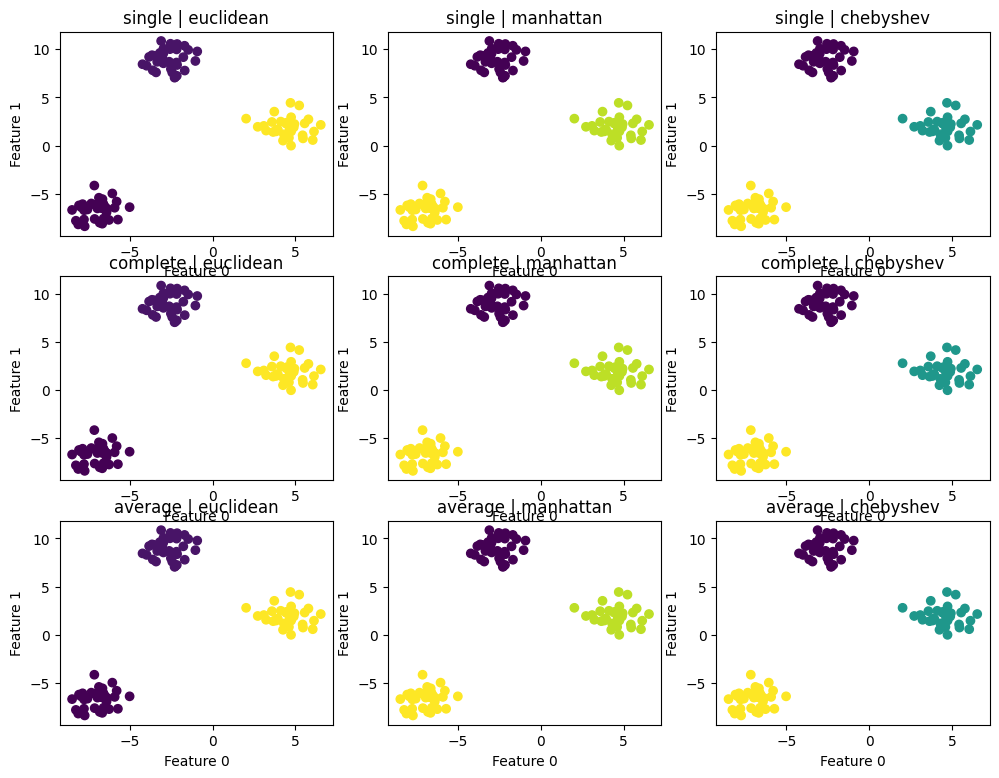

In [31]:
linkage_methods = ['single', 'complete', 'average']
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

X, y = make_blobs(n_samples=100, centers=3, random_state=42)
plt.figure(figsize=(12, 9))

for i, linkage in enumerate(linkage_methods):
    for j, distance in enumerate(distance_metrics):
        # Perform the clustering
        labels = agglo_hier_clust(X, n_clusters=3, linkage=linkage, distance=distance)

        # Plot the results
        plt.subplot(len(linkage_methods), len(distance_metrics), i * len(distance_metrics) + j + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels)
        plt.title('{} | {}'.format(linkage, distance))
        plt.xlabel('Feature 0')
        plt.ylabel('Feature 1')

plt.show()

## Question 16

Use now the scipy implementation of the hierarchical clustering algorithm and visualize the associated dendrogram. How many clusters should you choose inspecting the dendrogram? According to this number of cluster, compute the accuracy of the algorithm

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.metrics import adjusted_rand_score

Adjusted Rand Index (ARI): 1.0


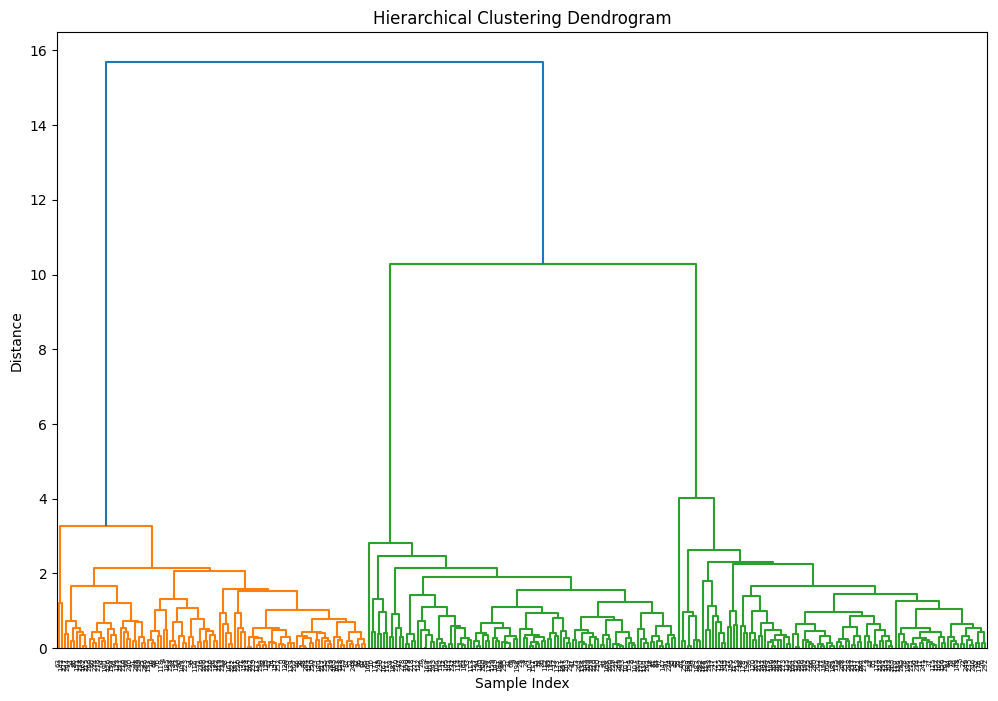

In [33]:
X, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Perform hierarchical clustering
Z = linkage(X, method='average')  # You can choose different linkage methods here

# For this example, let's assume hierarchical clustering results in predicted_labels
predicted_labels = fcluster(Z, t=3, criterion='maxclust')  # Cluster data into 3 clusters
ari = adjusted_rand_score(true_labels, predicted_labels)
print("Adjusted Rand Index (ARI):", ari)

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


From this dendrogram, it appears that there are two big categories, and the second catogory also have totally different two cateogries. Therefore, it will be reasonable decide that the number of clusters would be 3, considering the big distance difference between the 3 clusters. Consequently, judging by this conclusion, the algorithm is accurate, as the blobs were initialized to have 3 centers, meaning 3 clusters, and that's what the algorithm infers. The accuracy using the ARI measure is a perfect 1, when choosing 3 clusters.

# Part 4: Clustering Algorithms Comparison

## Question 17

- Import three images datasets as we did in previous labs: MNIST, FashionMNIST and CIFAR10. Vectorize these images to have vector input data.

In [34]:
#### finallll
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import shuffle


# Define the transform for the datasets
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the datasets
mnist_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
fashion_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
cifar_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Vectorize the datasets
mnist_data = mnist_dataset.data.numpy().reshape(-1, 28*28)
fashion_data = fashion_dataset.data.numpy().reshape(-1, 28*28)
cifar_data = np.array([np.array(cifar_dataset[i][0]).reshape(-1) for i in range(len(cifar_dataset))])

# Normalize the data
mnist_data = mnist_data.astype('float32') / 255
fashion_data = fashion_data.astype('float32') / 255
cifar_data = cifar_data.astype('float32') / 255

# Downsample the datasets
def downsample_shuffle(data, labels, n_samples=1000):
    data, labels = shuffle(data, labels, random_state=0)
    return data[:n_samples], labels[:n_samples]

mnist_data, mnist_labels = downsample_shuffle(mnist_data, mnist_dataset.targets, 1000)
fashion_data, fashion_labels = downsample_shuffle(fashion_data, fashion_dataset.targets, 1000)
cifar_data, cifar_labels = downsample_shuffle(cifar_data, [cifar_dataset.targets[i] for i in range(len(cifar_dataset))], 1000)

# Reshape CIFAR-10 image data to match MNIST and FashionMNIST shape
cifar_data = np.array(cifar_data.reshape(-1, 3, 32, 32).transpose(0, 3, 1, 2).astype('float32') / 255)

13.2%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw




100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw




100.0%
100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data


## Question 18

- Perform K-means, Hierarchical clustering and Model-based algorithms (GMM) (you all have seen these algorithms in class). You can use these algorithms from sklearn.

NB: use images of these datasets to perform clustering, keep the labels only to assign performances of your algorithms.

In [35]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=50, random_state=42)
mnist_kmeans_labels = kmeans.fit_predict(mnist_data)
fashion_kmeans_labels = kmeans.fit_predict(fashion_data)
cifar_kmeans_labels = kmeans.fit_predict(cifar_data.reshape(1000, -1))

In [36]:
# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=50)
mnist_hierarchical_labels = hierarchical.fit_predict(mnist_data)
fashion_hierarchical_labels = hierarchical.fit_predict(fashion_data)
cifar_hierarchical_labels = hierarchical.fit_predict(cifar_data.reshape(1000, -1))

In [37]:
# Perform GMM clustering
gmm = GaussianMixture(n_components=50, random_state=42)
mnist_gmm_labels =gmm.fit_predict(mnist_data)
fashion_gmm_labels = gmm.fit_predict(fashion_data)
cifar_gmm_labels = gmm.fit_predict(cifar_data.reshape(1000, -1))

## Question 19

Asses the performance of each algorithm.

On each dataset, describe what you observe. Overall, is there any algorithms that is better? If yes, why?

These are the results obtained from the downsampled dataset (1000 sample), as seen, Hierarchical clustering was the closest to the right labels in general. MNIST and FashionMNIST: Hierarchical clustering shows the highest ARI values on both datasets, indicating better clustering performance compared to K-means and GMM. This could be due to the hierarchical nature of the clustering process, which can capture complex relationships between data points better than K-means and GMM.
CIFAR-10: All algorithms show relatively low ARI values on this dataset, suggesting that they struggle to capture meaningful clusters. This could be attributed to the high complexity and variability of images in CIFAR-10, making it challenging for clustering algorithms to identify distinct groups.

MNIST - K-means ARI: 0.44260001815356714
FashionMNIST - K-means ARI: 0.3193045831289923
CIFAR-10 - K-means ARI: 0.03980882444364007
MNIST - Hierarchical ARI: 0.4841191568709999
FashionMNIST - Hierarchical ARI: 0.42885713583951623
CIFAR-10 - Hierarchical ARI: 0.027139098869455088
MNIST - GMM ARI: 0.44260001815356714
FashionMNIST - GMM ARI: 0.3193045831289923
CIFAR-10 - GMM ARI: 0.0

An interpretation of such low accuracy is that the algorithm knows how to form a cluster, but it doesn't know what each cluster means, so it assigns random labels to each cluster, which in most cases doesn't allign with the true label. Also another trial with 50 clusters was made and the results was even worse, becuase the true classes are only 10 and also because of the random labels.

In [38]:
## Evaluate performance

# K-means
mnist_kmeans_ari = adjusted_rand_score(mnist_labels, mnist_kmeans_labels)
fashion_kmeans_ari = adjusted_rand_score(fashion_labels, fashion_kmeans_labels)
cifar_kmeans_ari = adjusted_rand_score(cifar_labels, cifar_kmeans_labels)

# Hierarchical
mnist_hierarchical_ari = adjusted_rand_score(mnist_labels, mnist_hierarchical_labels)
fashion_hierarchical_ari = adjusted_rand_score(fashion_labels, fashion_hierarchical_labels)
cifar_hierarchical_ari = adjusted_rand_score(cifar_labels, cifar_hierarchical_labels)

# GMM
mnist_gmm_ari = adjusted_rand_score(mnist_labels, mnist_gmm_labels)
fashion_gmm_ari = adjusted_rand_score(fashion_labels, fashion_gmm_labels)
cifar_gmm_ari = adjusted_rand_score(cifar_labels, cifar_gmm_labels)

# Print the ARI
print("MNIST - K-means ARI:", mnist_kmeans_ari)
print("FashionMNIST - K-means ARI:", fashion_kmeans_ari)
print("CIFAR-10 - K-means ARI:", cifar_kmeans_ari)

print("MNIST - Hierarchical ARI:", mnist_hierarchical_ari)
print("FashionMNIST - Hierarchical ARI:", fashion_hierarchical_ari)
print("CIFAR-10 - Hierarchical ARI:", cifar_hierarchical_ari)

print("MNIST - GMM ARI:", mnist_gmm_ari)
print("FashionMNIST - GMM ARI:", fashion_gmm_ari)
print("CIFAR-10 - GMM ARI:", cifar_gmm_ari)

MNIST - K-means ARI: 0.22343256806819806
FashionMNIST - K-means ARI: 0.17774923253340114
CIFAR-10 - K-means ARI: 0.02823620352188354
MNIST - Hierarchical ARI: 0.24884121115391608
FashionMNIST - Hierarchical ARI: 0.18758016700112956
CIFAR-10 - Hierarchical ARI: 0.026031549942249568
MNIST - GMM ARI: 0.22343256806819806
FashionMNIST - GMM ARI: 0.17774923253340114
CIFAR-10 - GMM ARI: 0.0


In [39]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
mnist_kmeans_labels = kmeans.fit_predict(mnist_data)
fashion_kmeans_labels = kmeans.fit_predict(fashion_data)
cifar_kmeans_labels = kmeans.fit_predict(cifar_data.reshape(1000, -1))

In [40]:
# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=10)
mnist_hierarchical_labels = hierarchical.fit_predict(mnist_data)
fashion_hierarchical_labels = hierarchical.fit_predict(fashion_data)
cifar_hierarchical_labels = hierarchical.fit_predict(cifar_data.reshape(1000, -1))

In [41]:
# Perform GMM clustering
gmm = GaussianMixture(n_components=10, random_state=42)
mnist_gmm_labels =gmm.fit_predict(mnist_data)
fashion_gmm_labels = gmm.fit_predict(fashion_data)
cifar_gmm_labels = gmm.fit_predict(cifar_data.reshape(1000, -1))

In [42]:
## Evaluate performance

# K-means
mnist_kmeans_ari = adjusted_rand_score(mnist_labels, mnist_kmeans_labels)
fashion_kmeans_ari = adjusted_rand_score(fashion_labels, fashion_kmeans_labels)
cifar_kmeans_ari = adjusted_rand_score(cifar_labels, cifar_kmeans_labels)

# Hierarchical
mnist_hierarchical_ari = adjusted_rand_score(mnist_labels, mnist_hierarchical_labels)
fashion_hierarchical_ari = adjusted_rand_score(fashion_labels, fashion_hierarchical_labels)
cifar_hierarchical_ari = adjusted_rand_score(cifar_labels, cifar_hierarchical_labels)

# GMM
mnist_gmm_ari = adjusted_rand_score(mnist_labels, mnist_gmm_labels)
fashion_gmm_ari = adjusted_rand_score(fashion_labels, fashion_gmm_labels)
cifar_gmm_ari = adjusted_rand_score(cifar_labels, cifar_gmm_labels)

# Print the ARI
print("MNIST - K-means ARI:", mnist_kmeans_ari)
print("FashionMNIST - K-means ARI:", fashion_kmeans_ari)
print("CIFAR-10 - K-means ARI:", cifar_kmeans_ari)

print("MNIST - Hierarchical ARI:", mnist_hierarchical_ari)
print("FashionMNIST - Hierarchical ARI:", fashion_hierarchical_ari)
print("CIFAR-10 - Hierarchical ARI:", cifar_hierarchical_ari)

print("MNIST - GMM ARI:", mnist_gmm_ari)
print("FashionMNIST - GMM ARI:", fashion_gmm_ari)
print("CIFAR-10 - GMM ARI:", cifar_gmm_ari)

MNIST - K-means ARI: 0.44260001815356714
FashionMNIST - K-means ARI: 0.3193045831289923
CIFAR-10 - K-means ARI: 0.03980882444364007
MNIST - Hierarchical ARI: 0.4841191568709999
FashionMNIST - Hierarchical ARI: 0.42885713583951623
CIFAR-10 - Hierarchical ARI: 0.027139098869455088
MNIST - GMM ARI: 0.44260001815356714
FashionMNIST - GMM ARI: 0.3193045831289923
CIFAR-10 - GMM ARI: 0.0


## Question 20

List pros and cons of each algorithms from what you have seen during the lab.

For the Kmeans algorithm, the number of classes (cluseters) has to be known beforehand, which is not the case for most of the problems. However, it is easy to understand and implement, and fast if applied for large datasets. Also, for complex datasets, like the one having two clusters each one is a circle and the out circle surrounds the inner circle, the kmeans won't converge to the optimal solution, as it would always shift as the number of iteration proceeds. Also, the final result highly depends on the initialization of centroids.


 On the other side, Hierarchical clustering is benificial when we don't know the numbers of clusters beforehand.  Moreover, it exhibits greater robustness to noise and outliers compared to K-means. however, it is slow a s it calculates the distance (and the similarity) at each iteration, so it is not practical when used in big datasets.
 
 The Gaussian Mixture Model (GMM) offers a probabilistic approach to clustering, enabling soft assignments of data points to clusters. Its flexibility in capturing complex data distributions surpasses that of K-means, accommodating clusters of various shapes and sizes. However, GMM is sensitive to initial parameters, which can lead to convergence towards local optima. It also incurs higher computational costs, especially in high-dimensional data. Estimating Gaussian distribution parameters can be challenging, and GMM may not be suitable for very large datasets due to its complexity.